In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width: 100%; !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd

import time
import random
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.precision',3)

In [4]:
def initlattice(x, y, dist):
    dx = float(dist)
    dy = np.sin(np.pi / 3) * dist
    result = []
    iid = 0
    for j in range(y):
        if (j % 2 == 0):
            shift = 0
        else:
            shift = dx / 2
        for i in range(x):
            result.append(np.array([iid, shift + i*dx, j*dy]))
            iid += 1
    result = np.array(result)
    return result

In [5]:
def Distance(a, b):
    dot_a = np.array([a[1], a[2]])    
    dot_b = np.array([[b[1], b[1]+ax, b[1]-ax], [b[2], b[2]+ay, b[2]-ay]])
    dot_b = dot_b.reshape(-1, 1)
    
    dist_x = dot_a[0] - dot_b[:3]
    dist_y = dot_a[1] - dot_b[3:]
    
    res = np.sqrt(np.power(dist_x, 2) + np.power(dist_y, 2))
    return res.min()

In [6]:
def DistanceManhattan(a, b):
    dot_a = np.array([a[1], a[2]])    
    dot_b = np.array([[b[1], b[1]+ax, b[1]-ax], [b[2], b[2]+ay, b[2]-ay]])
    dot_b = dot_b.reshape(-1, 1)
    
    dist_x = dot_a[0] - dot_b[:3]
    dist_y = dot_a[1] - dot_b[3:]
    
    res = np.absolute(dist_x) + np.absolute(dist_y)
    return res.min()

In [7]:
def MinDistance(point_, points_):
    res = [d0 + 0.1]
    for apoint in points_:
        if (apoint[0] != point_[0]) and (DistanceManhattan(point_, apoint) < d0*2):
            res.append(Distance(point_, apoint))
    res = np.array(res)
    return res.min()

In [8]:
def V(distance):
    return 1 / distance

In [9]:
def CalcEnergy(points_):
#     energy = 0
    e = []
    for x in range(len(points_)):
        for y in range(x, len(points_)):
            if (points_[x, 0] != points_[y, 0]):
                e.append(Distance(points_[x], points_[y]))
#                 energy += V(Distance(points_[x], points_[y]))
    e = np.array(e)
    energy = V(e)
    return energy.sum()

In [10]:
def MovePoint(point, alpha):
    ksi1 = random.uniform(-1, 1)
    ksi2 = random.uniform(-1, 1)
    x = point[1] + ksi1*alpha
    y = point[2] + ksi2*alpha
    if (x < 0):
        x += ax
    elif (x > ax):
        x -= ax
    if (y < 0):
        y += ay
    elif (y > ay):
        y -= ay
    return np.array([point[0], x, y])

In [11]:
def DoLoop(points_):
    oldenergy = CalcEnergy(points_)
    for point in points_:
        oldx = point[1]
        oldy = point[2]
        tmp = MovePoint(point, alpha)
        if (MinDistance(tmp, points_) > d0):
            point[1] = tmp[1]
            point[2] = tmp[2]
            newenergy = CalcEnergy(points_)
            delta = newenergy - oldenergy
            if (delta > 0):
                ksi3 = random.uniform(0, 1)
                if (ksi3 < np.exp(-delta / (k*T))):
                    oldenergy = newenergy
                else:
                    point[1] = oldx
                    point[2] = oldy
            else:
                oldenergy = newenergy
        energy.append(oldenergy)

In [12]:
points = initlattice(7, 7, 1/10)
points_before = np.array(points)

energy = []
v = 7
T = 6
k = 1
d = 1/14
d0 = d*(1 - 2 ** (v - 8))
alpha = d - d0

ax = 1
ay = 1

In [13]:
random.seed()

for i in range(100):
    DoLoop(points)

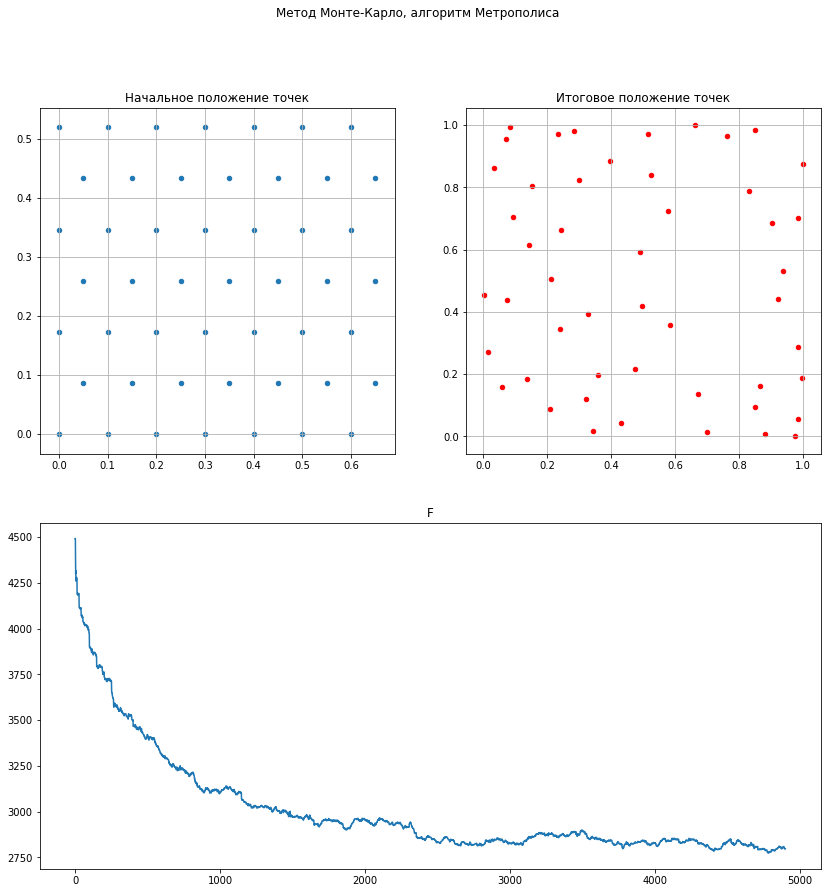

In [14]:
fig = plt.figure()
fig.set_figheight(14)
fig.set_figwidth(14)
fig.suptitle("Метод Монте-Карло, алгоритм Метрополиса")

ax1 = fig.add_subplot(221)
ax1.set_title('Начальное положение точек')
ax1.grid()
ax1.scatter(points_before[:, 1], points_before[:, 2], s=20)

ax2 = fig.add_subplot(222) 
ax2.set_title('Итоговое положение точек')
ax2.grid()
ax2.scatter(points[:, 1], points[:, 2], color='r', s=20)

ax3= fig.add_subplot(212)
ax3.set_title('F')
ax3.plot(energy)

plt.show()

In [17]:
# energy